In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification, make_regression
from sklearn.datasets import make_low_rank_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Frequency'>

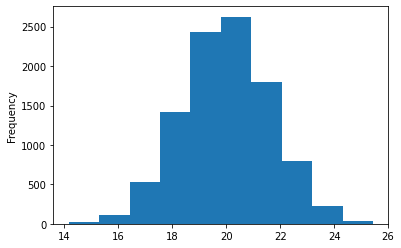

In [ ]:
X, y = make_regression(10_000, n_features=20, bias=20,
                            effective_rank=10, tail_strength=1)
pd.Series(y).plot.hist()

<AxesSubplot:ylabel='Frequency'>

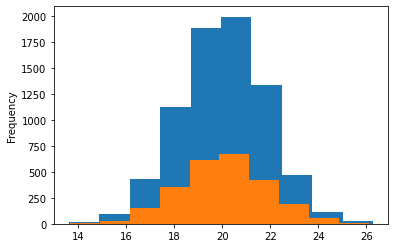

In [ ]:
X_train, X_test,y_train,  y_test = train_test_split(X, y)
pd.Series(y_train).plot.hist()
pd.Series(y_test).plot.hist()

In [ ]:
%%time
rf = RandomForestRegressor(criterion='mse')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mean_squared_error(y_test, y_pred), \
mean_absolute_percentage_error(y_test, y_pred)

CPU times: user 11.1 s, sys: 0 ns, total: 11.1 s
Wall time: 11.3 s


(0.5259256916379181, 0.028208282044759534)

<AxesSubplot:title={'center':'mse'}, ylabel='Frequency'>

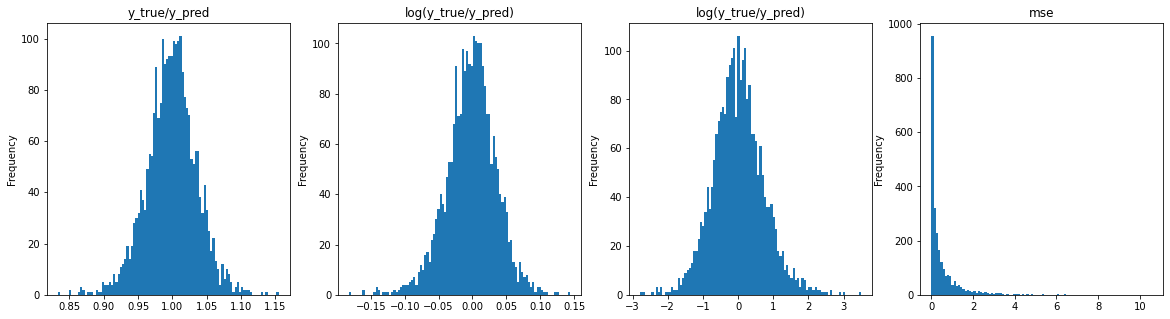

In [ ]:
plt.figure(figsize=(20,5))
ax = plt.subplot(141)
pd.Series(y_test / y_pred).plot.hist(ax=ax, title='y_true/y_pred', bins=100)
ax = plt.subplot(142)
pd.Series(np.log(y_test / y_pred)).plot(kind='hist', 
                                        title='log(y_true/y_pred)',ax=ax, bins=100)
ax = plt.subplot(143)
pd.Series(y_test * np.log(y_test / y_pred)).plot(kind='hist', 
                                                 title='log(y_true/y_pred)',ax=ax, bins=100)
ax = plt.subplot(144)
pd.Series((y_test - y_pred)**2).plot(kind='hist', title='mse',ax=ax, bins=100)

In [ ]:
# %%time
rf = RandomForestRegressor(criterion='poisson')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mean_squared_error(y_test, y_pred), \
mean_absolute_percentage_error(y_test, y_pred)

(1.739207513199444, 0.05393788491272117)

<AxesSubplot:title={'center':'mse'}, ylabel='Frequency'>

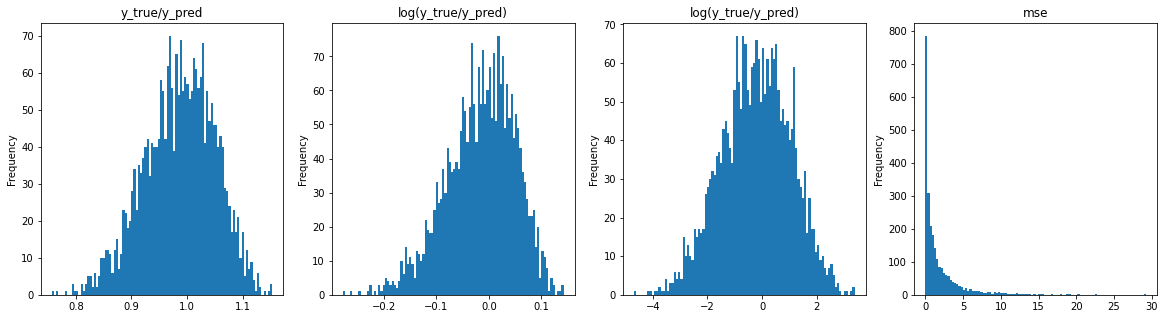

In [ ]:
plt.figure(figsize=(20,5))
ax = plt.subplot(141)
pd.Series(y_test / y_pred).plot.hist(ax=ax, title='y_true/y_pred', bins=100)
ax = plt.subplot(142)
pd.Series(np.log(y_test / y_pred)).plot(kind='hist', 
                                        title='log(y_true/y_pred)',ax=ax, bins=100)
ax = plt.subplot(143)
pd.Series(y_test * np.log(y_test / y_pred)).plot(kind='hist', 
                                                 title='log(y_true/y_pred)',ax=ax, bins=100)
ax = plt.subplot(144)
pd.Series((y_test - y_pred)**2).plot(kind='hist', title='mse',ax=ax, bins=100)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=219e0b3e-460c-4cdb-8d74-e96a8b6095f2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>